In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # To supress warnings

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Blood abnormality/Training Data - Classification of Patients with Abnormal Blood Pressure ....csv")

In [ ]:
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,0,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,0


In [ ]:
df.describe(include="all")

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.356500,0.298000
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.479085,0.457494
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.000000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.000000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,0.000000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.000000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [ ]:

df.shape

(2000, 15)

In [ ]:
df.drop('Patient_Number',axis=1,inplace=True)

# **EDA**

---



---


In [ ]:
print("Rows:",df.shape[0])
print("Columns:",df.shape[1])
print("-"*60,sep="")
print("Rows:",df.shape[0])
print("-"*60,sep="")
print("Features:-",df.columns.tolist())
print("-"*60,sep="")
print("Missing values:-\n",df.isnull().sum().sort_values(ascending=True))
print("-"*60,sep="")
print("Percantage of Missing values:-\n",round(df.isna().sum()/df.isna().count()*100,2))
print("-"*60,sep="")
print("Unique values:-\n",df.nunique())

Rows: 2000
Columns: 14
------------------------------------------------------------
Rows: 2000
------------------------------------------------------------
Features:- ['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy', 'Smoking', 'Physical_activity', 'salt_content_in_the_diet', 'alcohol_consumption_per_day', 'Level_of_Stress', 'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders']
------------------------------------------------------------
Missing values:-
 Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Age                                 0
BMI                                 0
Sex                                 0
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
Genetic_Pedigree_Coefficient       92
alcohol_c

**Observations:-**

---
1. Preganacy features is having most missing values-77%
2. Genetic pedigree coefficent does not contain much missing values only 4% values are missing.
3. Alcohol consumption also show missing values of around 12%



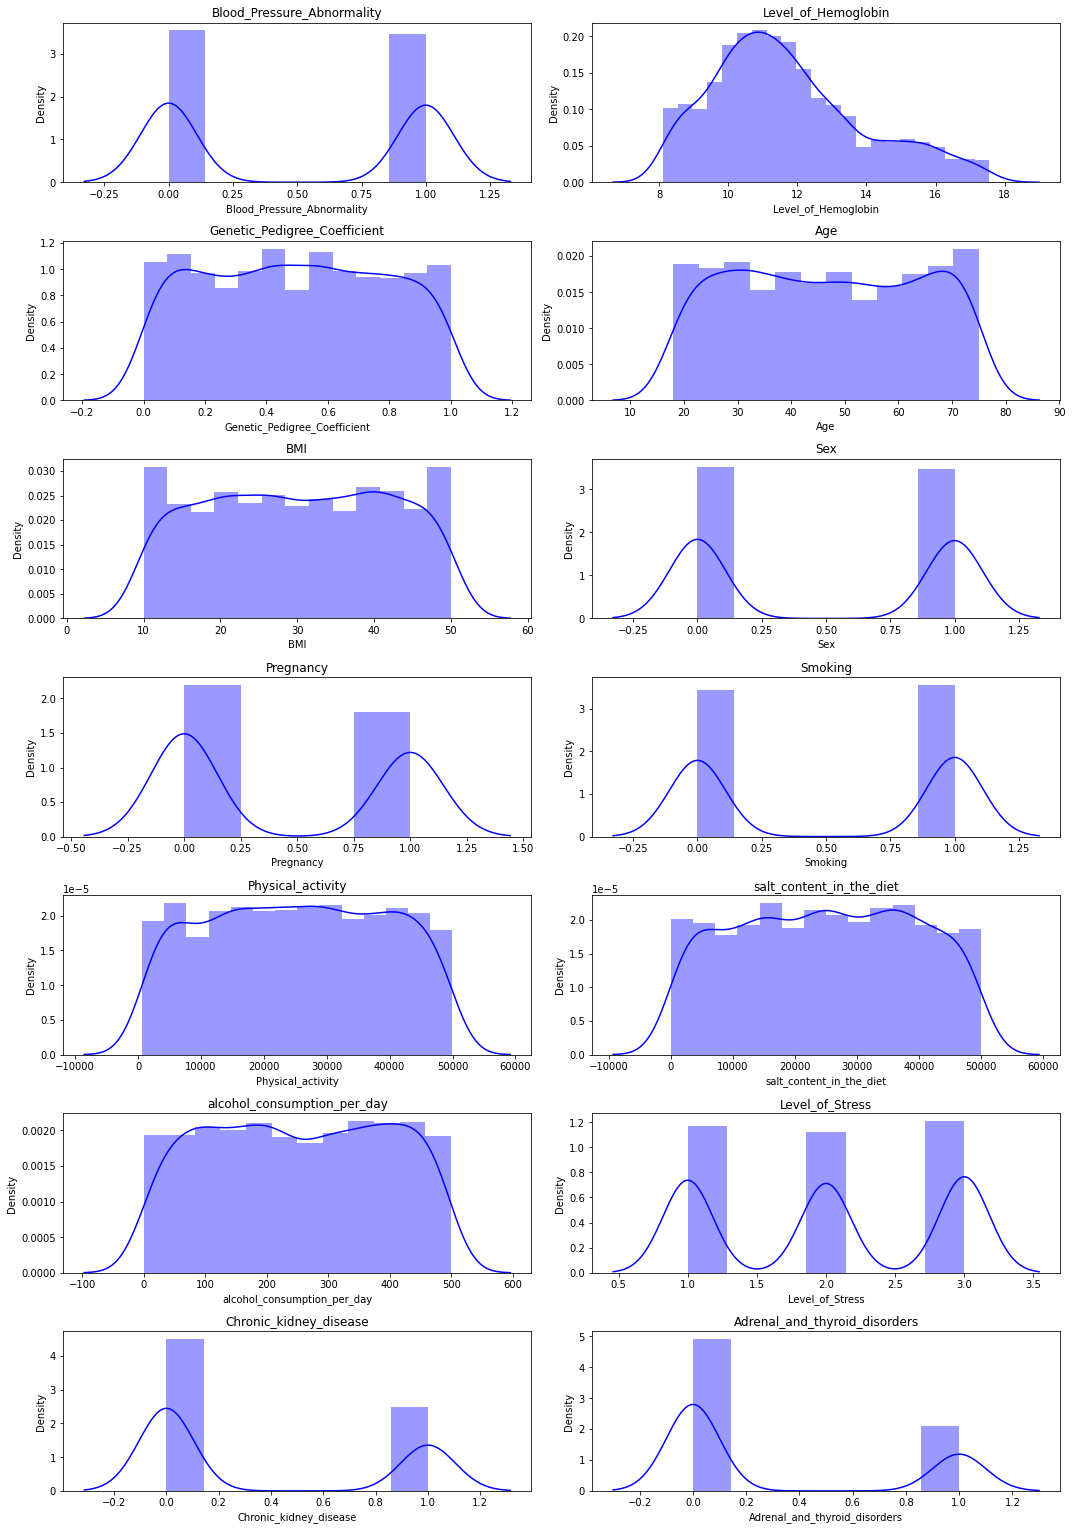

In [ ]:
plt.figure(figsize=(15,30))
col = df.columns.to_list()
for i , c_name in enumerate(col):
  plt.subplot(10,2,i+1)
  sns.distplot(df[c_name],kde=True,color='blue')
  plt.tight_layout()
  plt.title(c_name)

**Observations:-**

1. Level of hemoglobin is right skewed 
2. Outliers are not present df is almost well distributed 

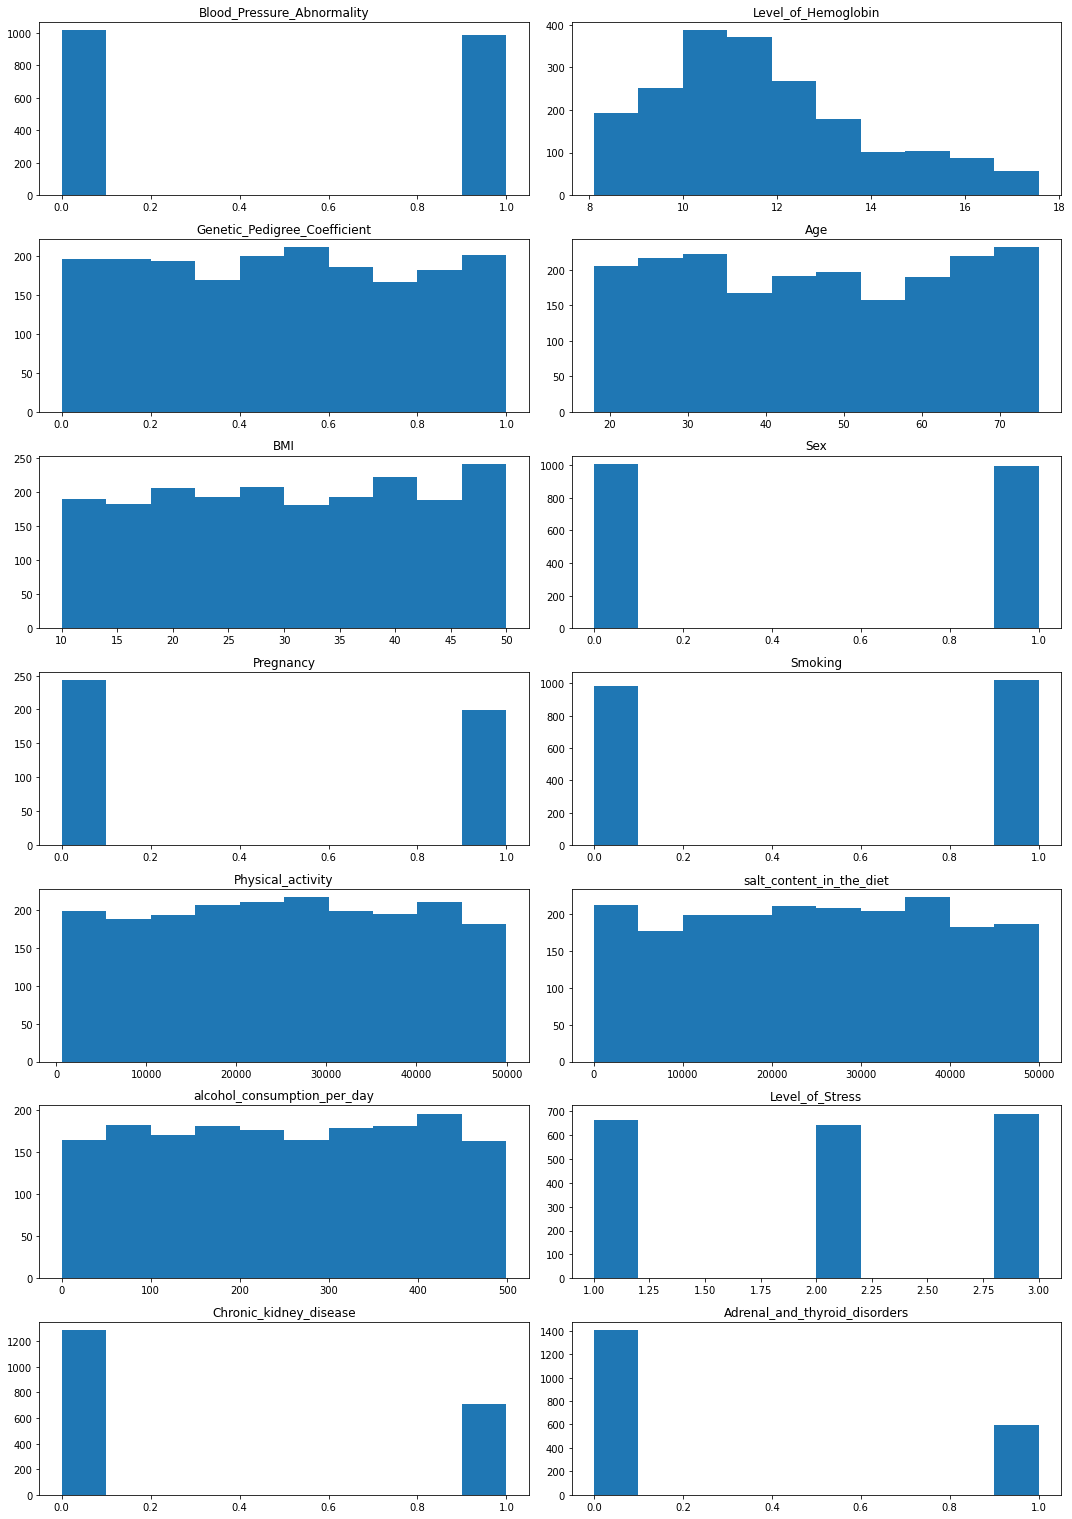

In [ ]:
plt.figure(figsize=(15,30))
col = df.columns.to_list()
for i , c_name in enumerate(col):
  plt.subplot(10,2,i+1)
  plt.hist(df[c_name],bins=10)
  plt.tight_layout()
  plt.title(c_name)

In [ ]:
df.corr()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
Blood_Pressure_Abnormality,1.000000,0.139488,-0.033458,-0.066322,0.040193,0.054902,-0.017331,0.012250,0.037952,0.014199,0.020773,0.009304,0.754053,0.660064
Level_of_Hemoglobin,0.139488,1.000000,-0.023621,-0.184394,0.117889,-0.412928,-0.404411,0.023349,-0.026604,0.022141,0.007865,0.004746,0.102930,0.068901
Genetic_Pedigree_Coefficient,-0.033458,-0.023621,1.000000,-0.022164,-0.010230,0.023103,0.063639,-0.036887,-0.007651,0.039028,-0.021080,0.012933,0.024795,-0.017946
Age,-0.066322,-0.184394,-0.022164,1.000000,0.028151,0.057941,-0.030985,0.025314,0.027068,-0.045740,0.017619,0.014057,-0.064039,-0.056876
BMI,0.040193,0.117889,-0.010230,0.028151,1.000000,0.010219,0.011357,0.008927,-0.004936,0.026385,-0.040780,-0.010689,0.043316,0.037879
Sex,0.054902,-0.412928,0.023103,0.057941,0.010219,1.000000,NaN,-0.000848,0.006297,-0.009347,0.004416,0.000729,0.042493,0.040195
Pregnancy,-0.017331,-0.404411,0.063639,-0.030985,0.011357,NaN,1.000000,-0.162890,-0.063492,0.010719,0.021178,0.046012,0.004314,-0.033940
Smoking,0.012250,0.023349,-0.036887,0.025314,0.008927,-0.000848,-0.162890,1.000000,-0.014974,0.003364,0.008671,-0.026398,-0.015189,0.009486
Physical_activity,0.037952,-0.026604,-0.007651,0.027068,-0.004936,0.006297,-0.063492,-0.014974,1.000000,-0.032261,-0.011322,-0.033700,0.020140,0.025471
salt_content_in_the_diet,0.014199,0.022141,0.039028,-0.045740,0.026385,-0.009347,0.010719,0.003364,-0.032261,1.000000,-0.029873,-0.019268,-0.009596,0.014040


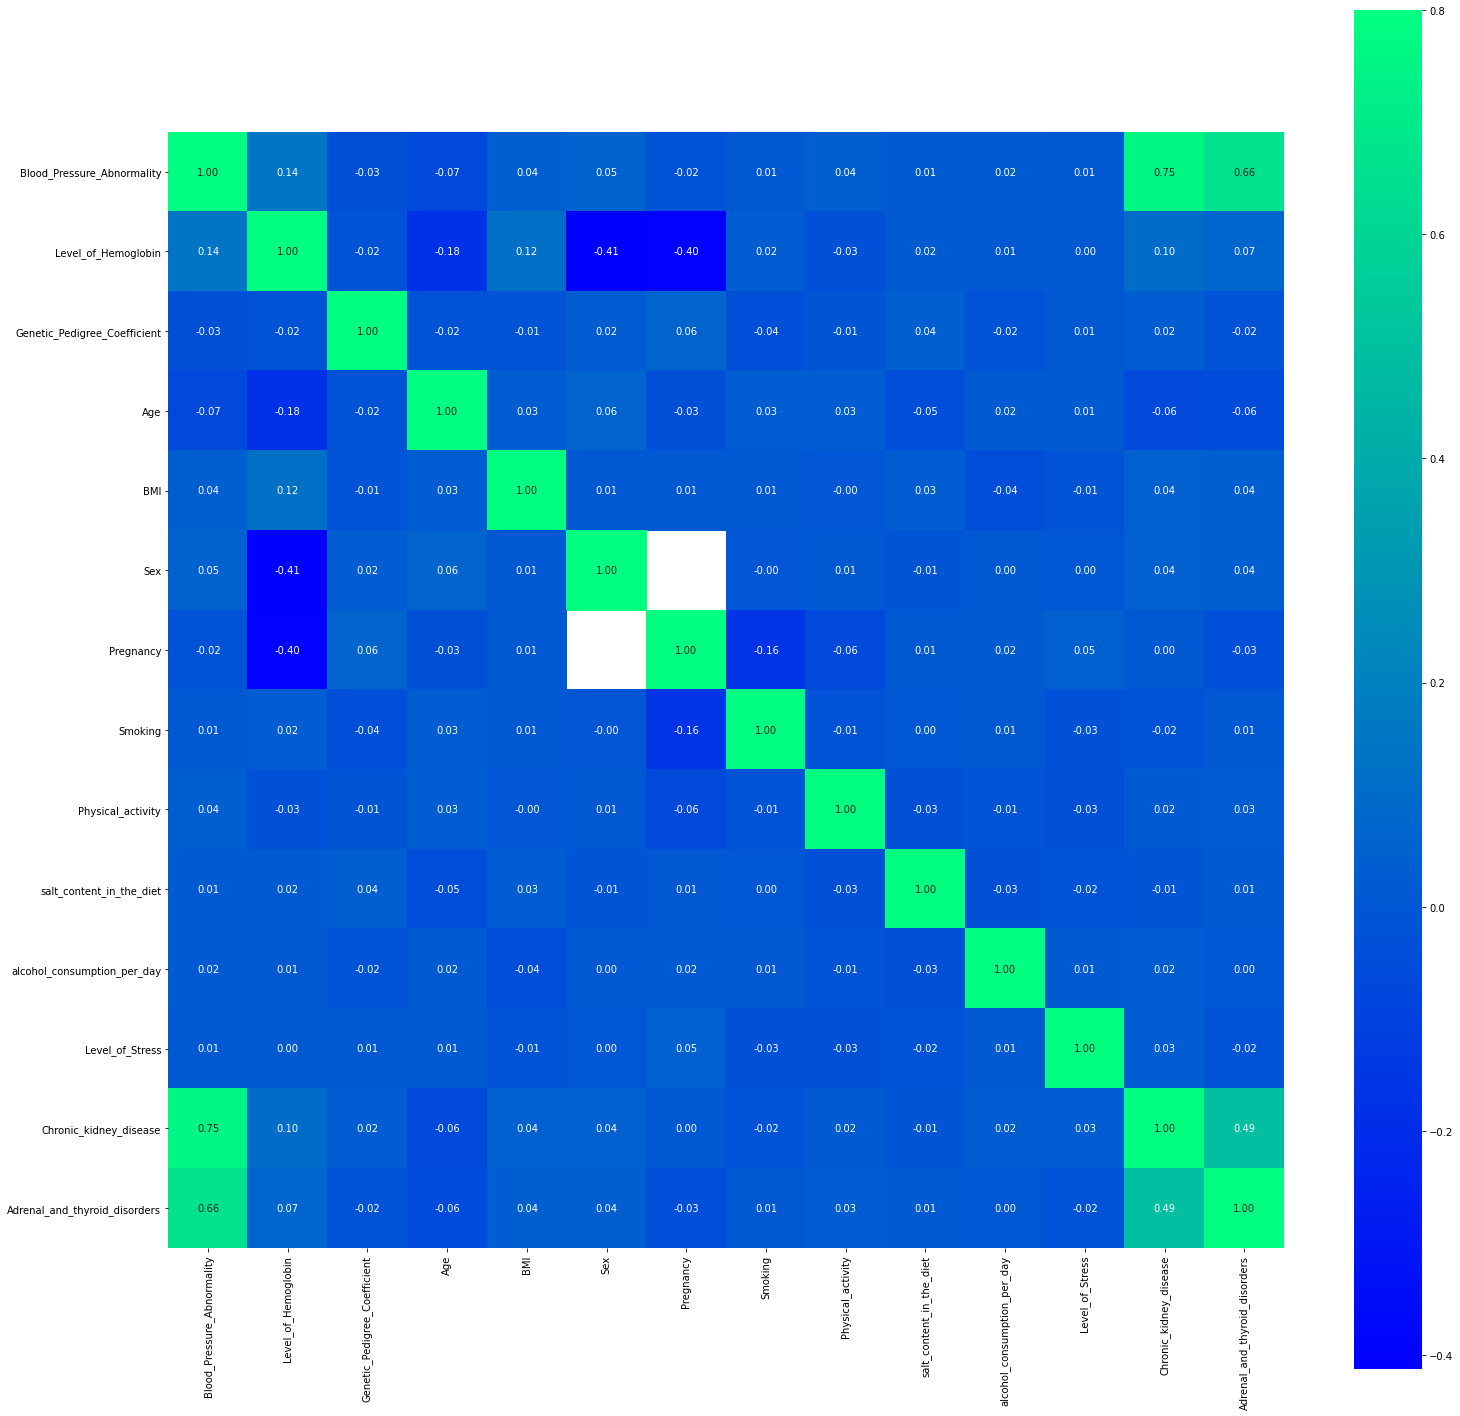

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),vmax=.8, square=True, annot=True, fmt='.2f', cmap='winter')

**Observations:-**

---

1. Only two feature i.e. Chronic_kidney_disease and Adrenal_and_thyroid_disorders are affecting blood presure abnormility

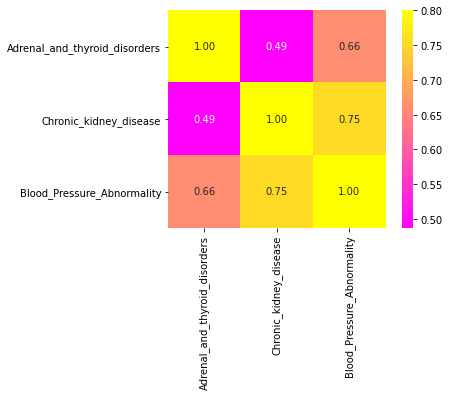

In [ ]:
# correlation map of affecting features

sns.heatmap(df[['Adrenal_and_thyroid_disorders','Chronic_kidney_disease','Blood_Pressure_Abnormality']].corr(),vmax=.8, square=True, annot=True, fmt='.2f', cmap='spring')

**Missing value Treatement**

---



In [ ]:
df.isnull().sum().sort_values(ascending=True)

Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Age                                 0
BMI                                 0
Sex                                 0
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
Genetic_Pedigree_Coefficient       92
alcohol_consumption_per_day       242
Pregnancy                        1558
dtype: int64

1. Genetic_Pedigree_Coefficient is having 92 missing values
2. As least possible value is 0 and max value is 1 mean 0.50 to and also missing numbers are less so can be imputed  with median 

In [ ]:
mid = df['Genetic_Pedigree_Coefficient'].median()
df['Genetic_Pedigree_Coefficient']=df['Genetic_Pedigree_Coefficient'].fillna(mid)

In [ ]:
df.isnull().sum().sort_values(ascending=True)

Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient        0
Age                                 0
BMI                                 0
Sex                                 0
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
alcohol_consumption_per_day       242
Pregnancy                        1558
dtype: int64

1. alcohol_consumption_per_day is having 242 missing values with min value 0 and max value 499 and mean is 249

In [ ]:
df['alcohol_consumption_per_day'].describe()

count    1758.000000
mean      251.008532
std       143.651884
min         0.000000
25%       126.250000
50%       250.000000
75%       377.750000
max       499.000000
Name: alcohol_consumption_per_day, dtype: float64

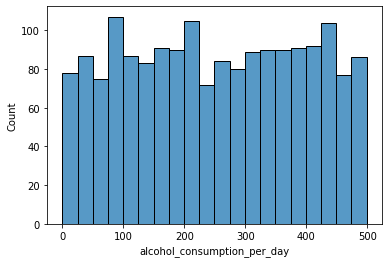

In [ ]:
sns.histplot(df['alcohol_consumption_per_day'],bins=20)

In [ ]:
m = df[df['Sex']==0]['alcohol_consumption_per_day']

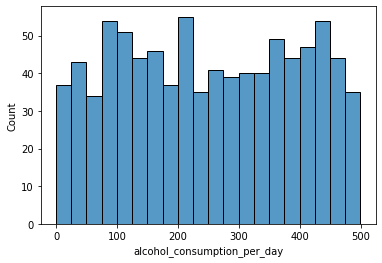

In [ ]:
sns.histplot(m,bins=20)

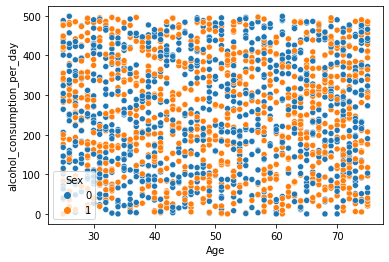

In [ ]:
sns.scatterplot(data= df ,x='Age',y='alcohol_consumption_per_day',hue='Sex')

In [ ]:
mean = df['alcohol_consumption_per_day'].mean()
df['alcohol_consumption_per_day']=df['alcohol_consumption_per_day'].fillna(mean)

In [ ]:
df.isnull().sum().sort_values(ascending=True)

Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient        0
Age                                 0
BMI                                 0
Sex                                 0
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day         0
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
Pregnancy                        1558
dtype: int64

Observations:-

As per survey alcohol consumption varies from adults to aged person and gender wise also. For an adult it should be upto 355 including both gender

Above scatterplot data normaly distributed and if we look at heatmap correlation of this feature is -0.04 to 0.02 so can be replaced these missing values with mean or median

In [ ]:
print("Total Male patients-",df[df['Sex']==0]['Sex'].count())
print("Total Female patients-",df[df['Sex']==1]['Sex'].count())

Total Male patients- 1008
Total Female patients- 992


In [ ]:
df.isnull().sum()

Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient        0
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day         0
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [ ]:
df.fillna(np.nan,inplace=True)
df


,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,251.008532,2,1,1
1,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.000000,3,0,0
2,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.000000,2,1,0
3,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.000000,1,0,0
4,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.000000,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.000000,3,1,0
1996,1,11.77,1.00,24,45,1,1.0,1,2572,8063,251.008532,3,1,1
1997,1,16.91,0.22,18,42,0,NaN,0,14933,24753,251.008532,2,1,1
1998,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.000000,3,0,0


In [ ]:
df[df['Sex']==0]['Pregnancy'].isna().sum()


1008

In [ ]:
df[df['Sex']==1]['Pregnancy'].isna().sum()

550

In [ ]:
print("Female patients with pregnancy-",df[df['Sex']==1]['Pregnancy'].count())
print("Female patients with pregnancy missing values count-",df[df['Sex']==1]['Pregnancy'].isnull().count())

Female patients with pregnancy- 442
Female patients with pregnancy missing values count- 992


**Observations:-**

1. It is known pregancy value of cannot be for male paitent so imputed them  as zero.
2. This feaure is not correlating with any other features which change in value will not do much with blood pressure level.
3. Also women which are in menopuse cannot be preganant age feature value is greater than 55 can be replace with zero
4. To impute remaining values mean and median values with respect to age are observed

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   2000 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Pregnancy                      442 non-null    float64
 7   Smoking                        2000 non-null   int64  
 8   Physical_activity              2000 non-null   int64  
 9   salt_content_in_the_diet       2000 non-null   int64  
 10  alcohol_consumption_per_day    2000 non-null   float64
 11  Level_of_Stress                2000 non-null   int64  
 12  Chronic_kidney_disease         2000 non-null   i

Data Splitting

In [ ]:
df.columns

Index(['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [ ]:
features=['Chronic_kidney_disease','Adrenal_and_thyroid_disorders']
predictors=['Blood_Pressure_Abnormality']
X = df[features].values
y = df[predictors].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=40)

In [ ]:
print("Training data-",x_train.shape,y_train.shape)
print("Testing data-",x_test.shape,y_test.shape)

Training data- (1500, 2) (1500, 1)
Testing data- (500, 2) (500, 1)


# **Model Selection**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

logr=LogisticRegression(random_state=42)
naive=GaussianNB()
randf=RandomForestClassifier(random_state=42,n_estimators=10)
svc=SVC(random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [ ]:
models=[logr,randf,svc,naive]

train_score=[]
test_score=[]
prec=[]
rec=[]
f1score=[]
no_of_predicated_values=[]

In [ ]:
mod=['Logistic Regression','RandomForestClassifier','SVC','Naive Bayes']

In [ ]:
def modelfit(modelname,xtrain,ytrain,xtest,ytest):
  modelname.fit(xtrain,ytrain)
  ypredict=modelname.predict(xtrain)

  tr_score=accuracy_score(ytrain,ypredict)
  train_score.append(tr_score)
 
  p_score=precision_score(ytrain,ypredict)
  prec.append(p_score)
 
  r_score=recall_score(ytrain,ypredict)
  rec.append(r_score)

  f_score=f1_score(ytrain,ypredict)
  f1score.append(f_score)

  modelname.fit(xtest,ytest)
  ypredict=modelname.predict(xtest)
  ts_score=accuracy_score(ytest,ypredict)
  test_score.append(ts_score)


In [ ]:
for m in models:
  modelfit(m,x_train,y_train,x_test,y_test)

In [ ]:
summery=pd.DataFrame(list(zip(mod,train_score,test_score,prec,rec,f1score)),columns=['Model','Train Score','Test Score','Precision','Recall','F1 Score'])

In [ ]:
summery

,Model,Train Score,Test Score,Precision,Recall,F1 Score
0,Logistic Regression,0.948,0.948,1.0,0.894166,0.944126
1,RandomForestClassifier,0.948,0.948,1.0,0.894166,0.944126
2,SVC,0.948,0.948,1.0,0.894166,0.944126
3,Naive Bayes,0.948,0.948,1.0,0.894166,0.944126


**Trial using Parameter optimization**

---



In [ ]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 100]
        }

In [ ]:
gs=GridSearchCV(randf, param_grid = params, cv = 3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=42,
                                   

In [ ]:
optimized_para=gs.best_estimator_
optimized_para

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
randf_opt=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
randf_opt.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_o_pred=randf_opt.predict(x_train)

In [ ]:
accuracy_score(y_train,y_o_pred)

0.948

# **Validation**

In [ ]:
from sklearn.model_selection import ShuffleSplit,KFold

from sklearn.model_selection import cross_val_score

kfold2 = ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
randf_val = RandomForestClassifier()
results = cross_val_score(randf_val, x_train, y_train, cv=kfold2)
print("Accuracy:- " ,results.mean(), results.std())

Accuracy:-  0.9522222222222222 0.008388704928078606


In [ ]:
kfold1 = KFold(n_splits=10, random_state=100)
randf_opt_kfold=RandomForestClassifier()
results = cross_val_score(randf_opt_kfold,x_train, y_train, cv=kfold1)
print("Accuracy:- " ,results.mean(), results.std())

Accuracy:-  0.9480000000000001 0.015143755588800732


In [ ]:
print(classification_report(y_test,logreg_test_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       250
           1       1.00      0.90      0.95       250

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



# **Using Pipeling**

---



In [ ]:
pipe_lr = Pipeline([('clf', logr)])
pipe_rf = Pipeline([('clf', randf)])
pipe_svm = Pipeline([('clf', svc)])
pipe_nb = Pipeline([('clf', naive)])
			
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range,
		'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': param_range}]

# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=10) 

gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr, gs_rf,  gs_svm,]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Random Forest', 2: 'Support Vector Machine', 3: 'Naive Bayes'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(x_train, y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(x_test)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(y_test, y_pred) > best_acc:
		best_acc = accuracy_score(y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])


Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.948
Test set accuracy score for best params: 0.948 

Estimator: Random Forest
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 1, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best training accuracy: 0.948
Test set accuracy score for best params: 0.948 

Estimator: Support Vector Machine
Best params: {'clf__C': 1, 'clf__kernel': 'linear'}
Best training accuracy: 0.948
Test set accuracy score for best params: 0.948 

Classifier with best test set accuracy: Logistic Regression


# **Using Class**

---



In [ ]:
class Model_Selector:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        #columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [ ]:
models1 = {
    'Logistic Regression':logr,
    'RandomForestClassifier': randf,
 #   'Naive Bayes':naive,
    'SVC': svc
}

params1 = {
    'Logistic Regression': { 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] ,'penalty':['none', 'l1', 'l2', 'elasticnet'],'C':[100, 10, 1.0, 0.1, 0.01]},
    'RandomForestClassifier': { 'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [16,32] },
    'SVC': [{'kernel': ['linear',], 'C': [1, 10]},{'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]}],
   # 'Naive Bayes':{'n_splits':5,  'n_repeats':3}  
}


In [ ]:
estimate=Model_Selector(models1,params1)
estimate.fit(x_train,y_train,scoring='f1',n_jobs=2)

Running GridSearchCV for Logistic Regression.
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    1.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 792 candidates, totalling 2376 fits


[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   16.7s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   38.0s
[Parallel(n_jobs=2)]: Done 1588 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 2376 out of 2376 | elapsed:  1.5min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.6s finished


In [ ]:
estimate.score_summary(sort_by='max_score')

Logistic Regression
RandomForestClassifier
SVC


,estimator,min_score,mean_score,max_score,std_score,C,penalty,solver,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,kernel,gamma
0,Logistic Regression,0.939655,0.94412,0.948498,0.00361053,100,none,newton-cg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,RandomForestClassifier,0.939655,0.94412,0.948498,0.00361053,NaN,NaN,NaN,False,40,auto,1,2,16,NaN,NaN
606,RandomForestClassifier,0.939655,0.94412,0.948498,0.00361053,NaN,NaN,NaN,False,40,auto,1,5,16,NaN,NaN
607,RandomForestClassifier,0.939655,0.94412,0.948498,0.00361053,NaN,NaN,NaN,False,40,auto,1,5,32,NaN,NaN
608,RandomForestClassifier,0.939655,0.94412,0.948498,0.00361053,NaN,NaN,NaN,False,40,auto,1,10,16,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Logistic Regression,NaN,NaN,NaN,NaN,0.01,elasticnet,newton-cg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Logistic Regression,NaN,NaN,NaN,NaN,0.01,elasticnet,lbfgs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Logistic Regression,NaN,NaN,NaN,NaN,0.01,elasticnet,liblinear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Logistic Regression,NaN,NaN,NaN,NaN,0.01,elasticnet,sag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
